# FINAL PROJECT

## Analytics Employee Attrition

### Preprocessing & Mengeksplor data

<b><i>Dalam proses analisis ini, saya akan mencoba memahami penyebab Attrition yang paling berpengaruh dan kelompok karyawan mana yang paling banyak mengalami risiko Attrition.</i></b>

Data SDM ini adalah kumpulan data fiksi yang dibuat oleh para data scientis IBM. Topik dari data ini adalah untuk mengidentifikasi faktor-faktor yang menyebabkan Attrition karyawan


### OVERVIEW

Pergantian karyawan adalah masalah yang mahal bagi perusahaan. Biaya sebenarnya untuk mengganti karyawan sering kali bisa sangat besar. Sebuah studi oleh Center for American Progress menemukan bahwa perusahaan biasanya membayar sekitar seperlima dari gaji karyawan untuk menggantikan karyawan itu, dan biaya dapat meningkat secara signifikan jika eksekutif atau karyawan dengan bayaran tertinggi harus diganti. Dengan kata lain, biaya penggantian karyawan untuk sebagian besar pengusaha tetap signifikan. Ini karena jumlah waktu yang dihabiskan untuk wawancara dan menemukan pengganti, bonus masuk untuk karyawan, dan hilangnya produktivitas selama beberapa bulan sementara karyawan baru harus terbiasa dengan peran barunya di perusahaan tersebut.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets_IBM.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

melalui data tersebut kita mendapatkan features yang dapat di ubah menjadi object untuk mengukurnya

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Dari sini saya mencoba mencari apakah ada null value dari data tersebut. Dari hasil di atas ternyata tidak ada null value yang saya temukan

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
df.describe(include='object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


# Preprocessing

Di Preprocessing ini saya akan mengisi null value dan data type.
Saya melakukan preprocessing ini karna seharusnya data-data tersebut termasuk type object namun di data tersebut di tulis sebagai integer

In [9]:
pd.DataFrame({'Variables' : df[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel']].columns, 
              'Data Type' : df[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel']].dtypes, 
              'Null Values' : df[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel']].isna().sum()}).reset_index(drop = True)

,Variables,Data Type,Null Values
0,Education,int64,0
1,EnvironmentSatisfaction,int64,0
2,JobInvolvement,int64,0
3,JobSatisfaction,int64,0
4,PerformanceRating,int64,0
5,RelationshipSatisfaction,int64,0
6,WorkLifeBalance,int64,0
7,JobLevel,int64,0


In [10]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [11]:
df['Education'].replace({1: 'Below College', 2: 'College', 3: 'Bachelor',  4: 'Master',  5: 'Doctor'}, inplace = True)

In [12]:
df['PerformanceRating'].replace({1: 'Low', 2: 'Good', 3: 'Excellent',  4: 'Outstanding'}, inplace = True)

In [13]:
df['WorkLifeBalance'].replace({1: 'Bad', 2: 'Good', 3: 'Better',  4: 'Best'}, inplace = True)

In [14]:
df['EnvironmentSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High',  4: 'Very High'}, inplace = True)

In [15]:
df['JobInvolvement'].replace({1: 'Low', 2: 'Medium', 3: 'High',  4: 'Very High'}, inplace = True)

In [16]:
df['JobSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High',  4: 'Very High'}, inplace = True)

In [17]:
df['RelationshipSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High',  4: 'Very High'}, inplace = True)

In [18]:
df['JobLevel'].replace({1: 'staff', 2: 'officer', 3: 'Assistant Manager',  4: 'Manager', 5: 'Senior Manager'}, inplace = True)

In [19]:
pd.DataFrame({'Variables' : df[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel']].columns, 
              'Data Type' : df[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel']].dtypes, 
              'Null Values' : df[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel']].isna().sum()}).reset_index(drop = True)

,Variables,Data Type,Null Values
0,Education,object,0
1,EnvironmentSatisfaction,object,0
2,JobInvolvement,object,0
3,JobSatisfaction,object,0
4,PerformanceRating,object,0
5,RelationshipSatisfaction,object,0
6,WorkLifeBalance,object,0
7,JobLevel,object,0


Dari kodingan di atas, saya telah mengubah Data type integer menjadi data type object agar memudahkan pada saat melakukan proses EDA 

# EDA

### TARGET VARIABLES

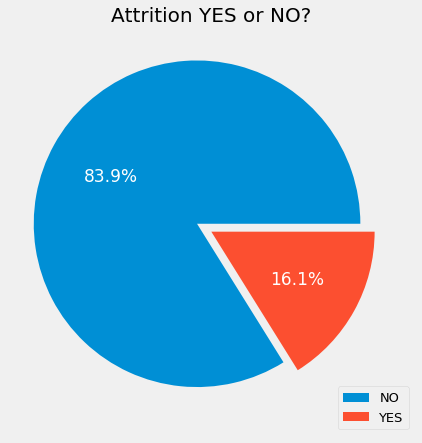

In [20]:
plt.figure(figsize = (8,7))
plt.title('Attrition YES or NO?', fontsize = 20)

labels = 'NO', 'YES'

plt.pie(df['Attrition'].value_counts(), autopct = '%.1f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower right', fontsize = 13)

plt.show()

Ada 83,9% yang masih tetap bertahan, sementara 16,1% keluar

saya akan mencari ciri-cirinya menggunakan CONTINOUS VARIABLES dan DISCRETE VARIABLES untuk menentukan bagaimana plotnya yang akan keluar dari hasil di atas




#### cari terorinya nanti ****

bersarkan teori atau artikel yang saya baca dan teori yang saya pahami, maka saya menyimpulkan dari data set ini beberapa point yang harus di jadikan tolak ukur 

## CONTINOUS VARIABLES


In [21]:
df_cont = df.loc[:, df.dtypes != np.object]

In [22]:
df_cont.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,94,5993,19479,8,11,80,0,8,0,6,4,0,5
1,49,279,8,1,2,61,5130,24907,1,23,80,1,10,3,10,7,1,7
2,37,1373,2,1,4,92,2090,2396,6,15,80,0,7,3,0,0,0,0
3,33,1392,3,1,5,56,2909,23159,1,11,80,0,8,3,8,7,3,0
4,27,591,2,1,7,40,3468,16632,9,12,80,1,6,3,2,2,2,2


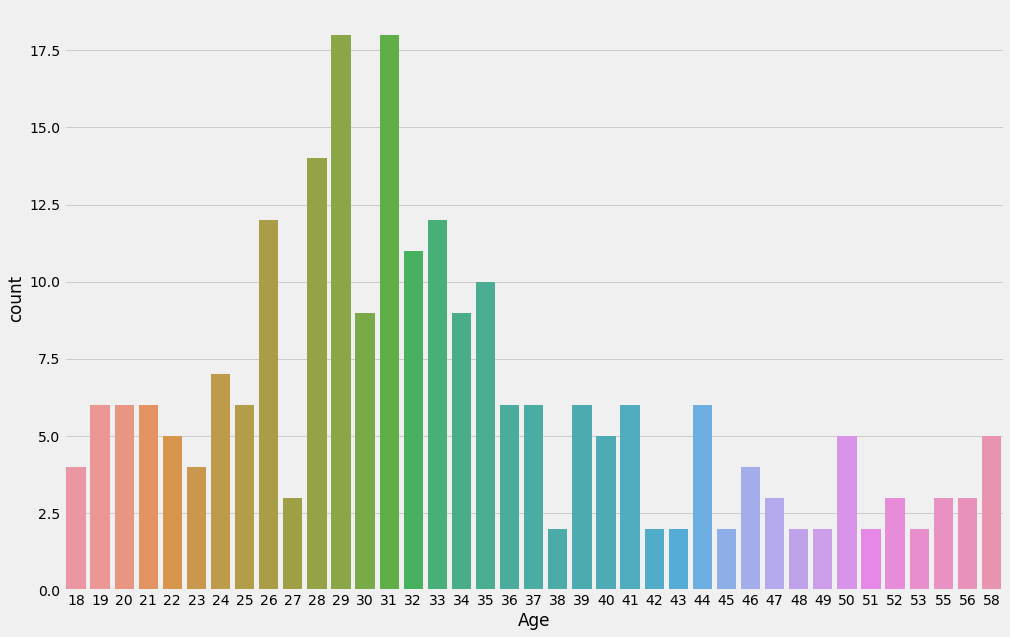

In [47]:
plt.figure(figsize=(15, 10))
sns.countplot(df[(df['Attrition']=='Yes')]['Age'])
plt.show()

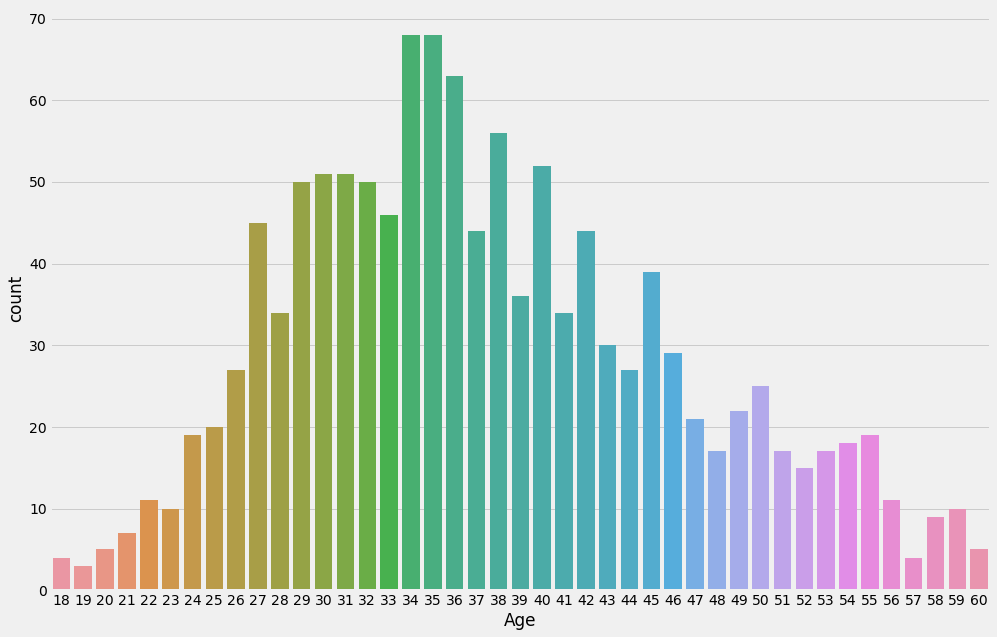

In [48]:
plt.figure(figsize=(15, 10))
sns.countplot(df[(df['Attrition']=='No')]['Age'])
plt.show()

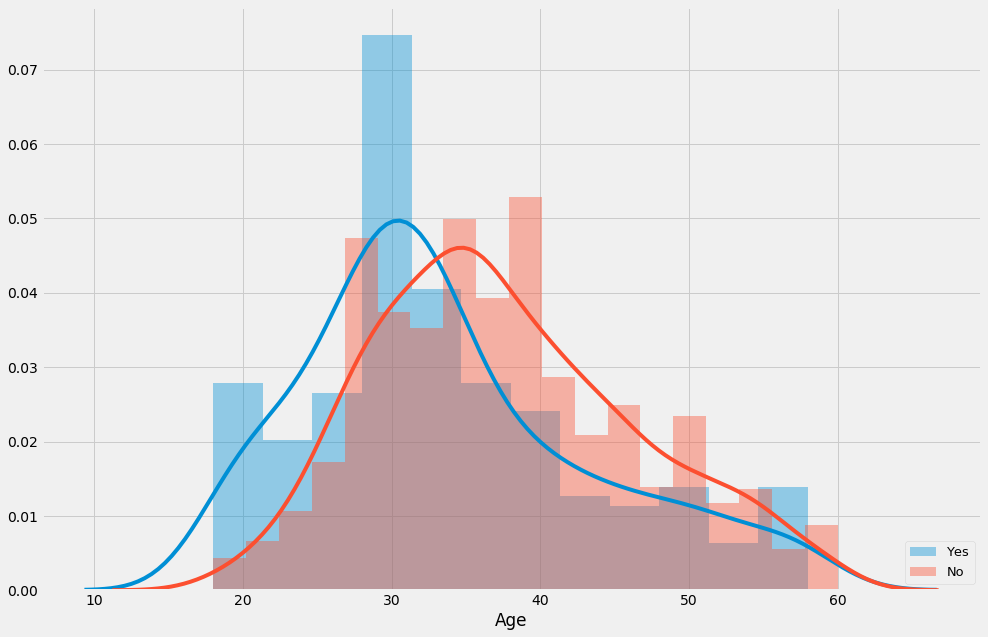

In [24]:
plt.figure(figsize=(15, 10))
sns.distplot(df[(df['Attrition']=="Yes")]['Age'])
sns.distplot(df[(df['Attrition']=="No")]['Age'])

labels='Yes', 'No'
plt.legend(labels, loc='lower right', fontsize = 13)
plt.show()

#### dari plot di atas menjelaskan bahwa kebanyakan karyawan yang keluar dari perusahaan di rentan umur 28~32 tahun

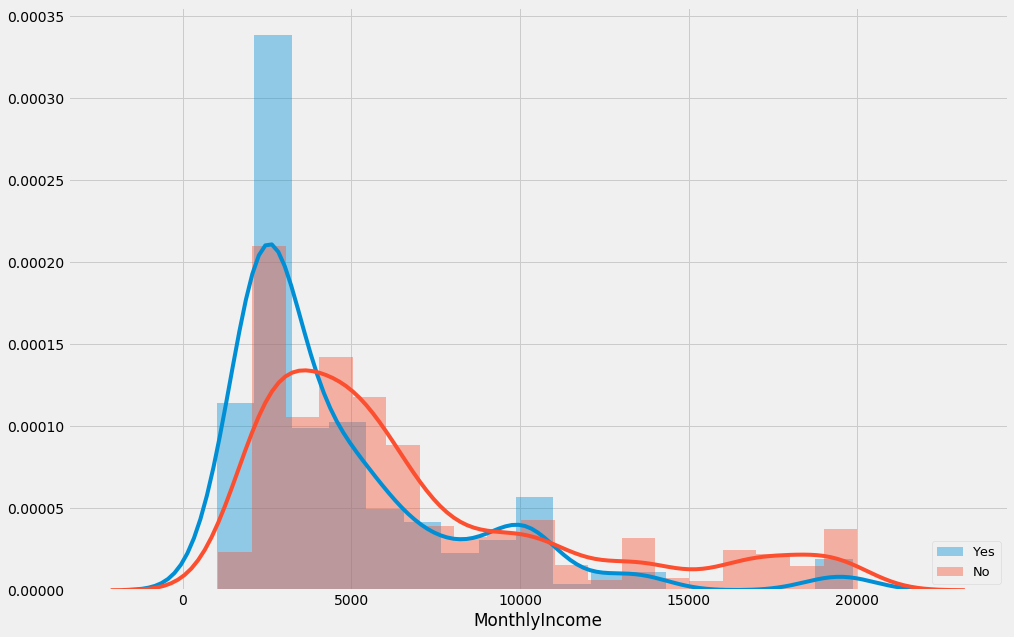

In [26]:
plt.figure(figsize=(15, 10))
sns.distplot(df[(df['Attrition']=="Yes")]['MonthlyIncome'])
sns.distplot(df[(df['Attrition']=="No")]['MonthlyIncome'])

labels='Yes', 'No'
plt.legend(labels, loc='lower right', fontsize = 13)
plt.show()

#### karyawan yang keluar dari perusahaan memiliki gaji di bawa 5000 

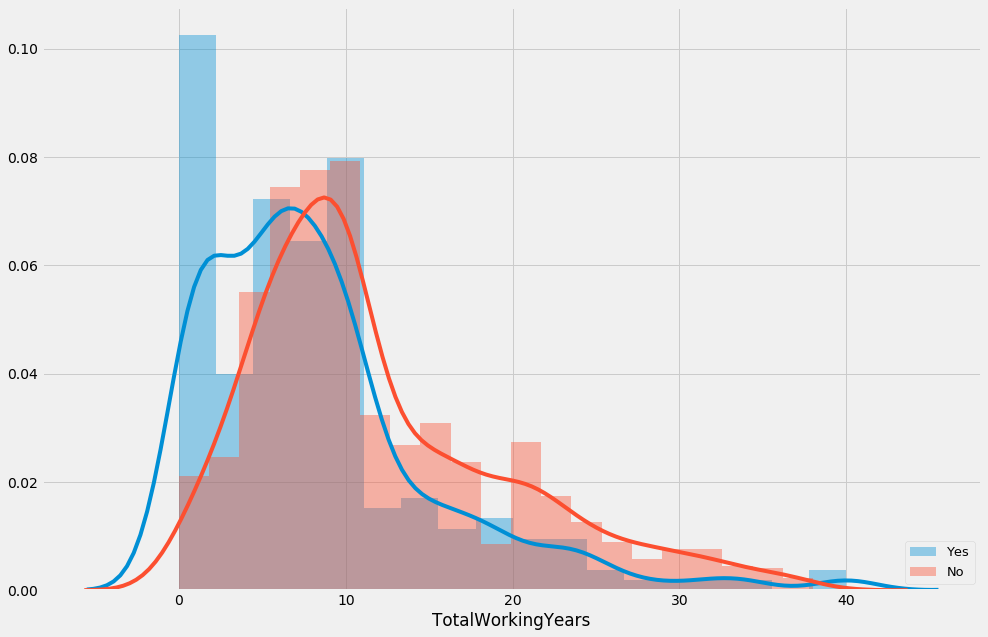

In [27]:
plt.figure(figsize=(15, 10))
sns.distplot(df[(df['Attrition']=="Yes")]['TotalWorkingYears'])
sns.distplot(df[(df['Attrition']=="No")]['TotalWorkingYears'])

labels='Yes', 'No'
plt.legend(labels, loc='lower right', fontsize = 13)
plt.show()

#### Kebanyakan karyawan yang keluar dari perusahaan memiliki pengalaman bekerja kurang dari 3 tahun

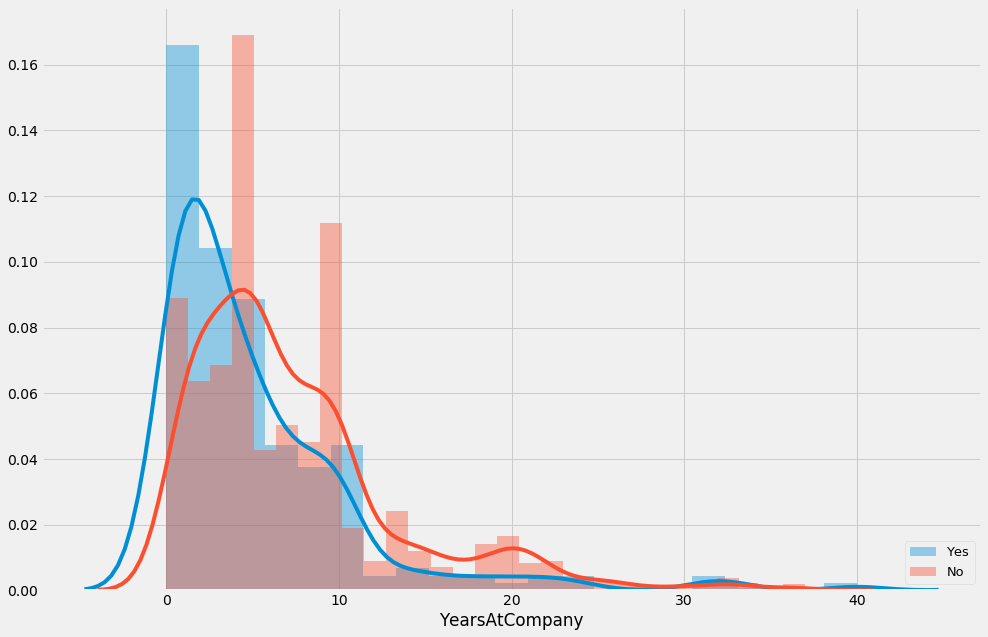

In [28]:
plt.figure(figsize=(15, 10))
sns.distplot(df[(df['Attrition']=="Yes")]['YearsAtCompany'])
sns.distplot(df[(df['Attrition']=="No")]['YearsAtCompany'])

labels='Yes', 'No'
plt.legend(labels, loc='lower right', fontsize = 13)
plt.show()


#### Karyawan yang keluar dari perusahaan memiliki pengalaman bekerja kurang dari 3 tahun

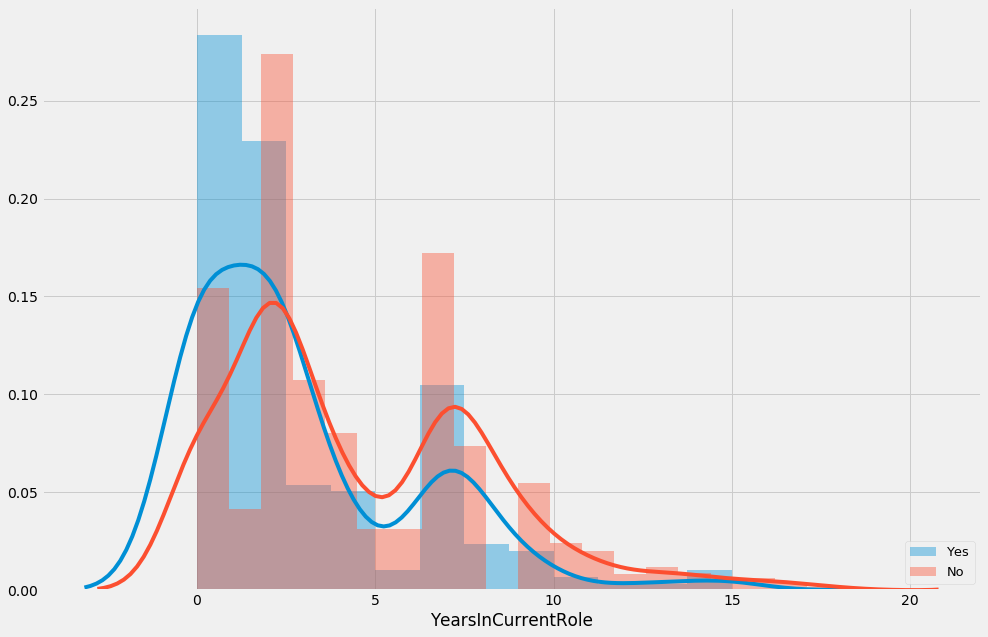

In [29]:
plt.figure(figsize=(15, 10))
sns.distplot(df[(df['Attrition']=="Yes")]['YearsInCurrentRole'])
sns.distplot(df[(df['Attrition']=="No")]['YearsInCurrentRole'])

labels='Yes', 'No'
plt.legend(labels, loc='lower right', fontsize = 13)
plt.show()

#### Kebanyakan karyawan yang keluar dari perusahaan memegang peranan pekerjaannya 2 tahun

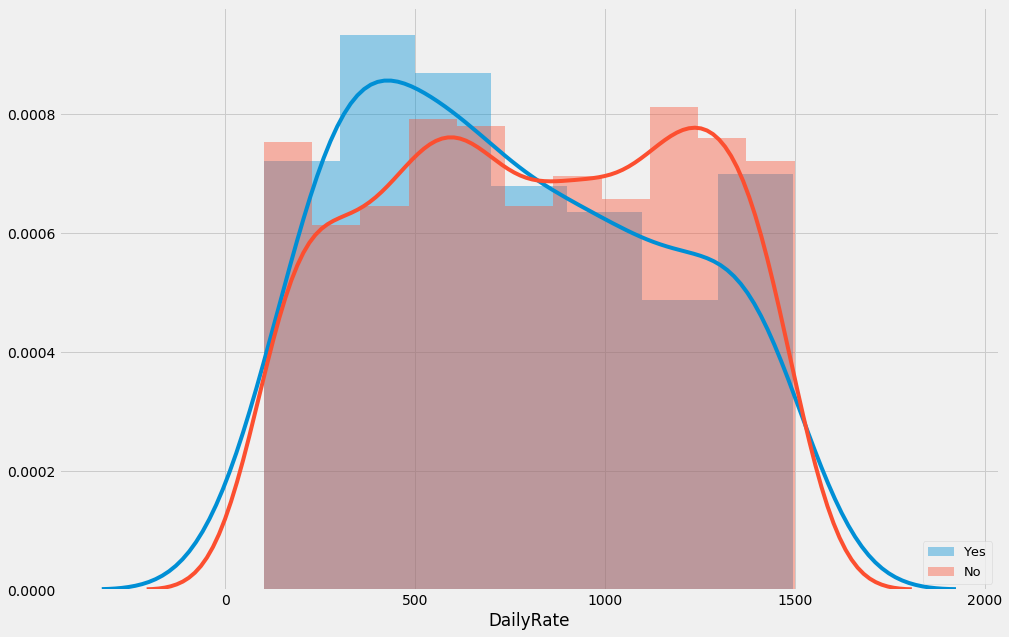

In [30]:
plt.figure(figsize=(15, 10))
sns.distplot(df[(df['Attrition']=="Yes")]['DailyRate'])
sns.distplot(df[(df['Attrition']=="No")]['DailyRate'])

labels='Yes', 'No'
plt.legend(labels, loc='lower right', fontsize = 13)
plt.show()

#### Jumlah uang yang harus dibayarkan perusahaan kepada karyawan untuk bekerja selama sehari kurang dari 500

bersarkan artikel ini 

garis besar(summary)

## DISCRETE VARIABLES


In [31]:
df_disc = df.loc[:, df.dtypes == np.object]

In [32]:
df_disc.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,officer,Sales Executive,Very High,Single,Y,Yes,Excellent,Low,Bad
1,No,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,officer,Research Scientist,Medium,Married,Y,No,Outstanding,Very High,Better
2,Yes,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,staff,Laboratory Technician,High,Single,Y,Yes,Excellent,Medium,Better
3,No,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,staff,Research Scientist,High,Married,Y,Yes,Excellent,High,Better
4,No,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,staff,Laboratory Technician,Medium,Married,Y,No,Excellent,Very High,Better


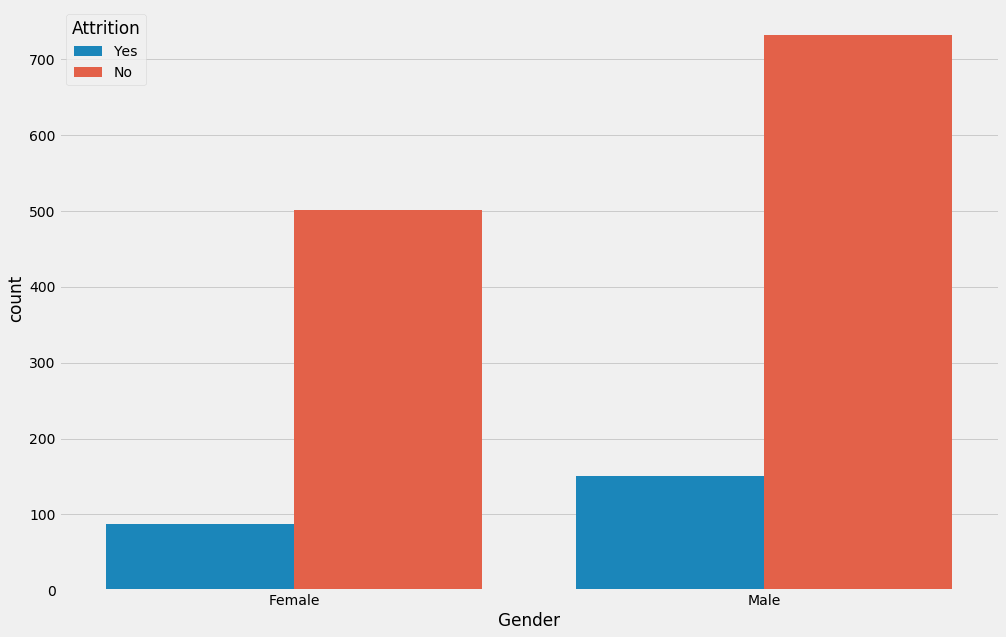

In [43]:
plt.figure(figsize=(15, 10))
sns.countplot(df['Gender'], hue=df['Attrition'])
#per variablenya
plt.show()

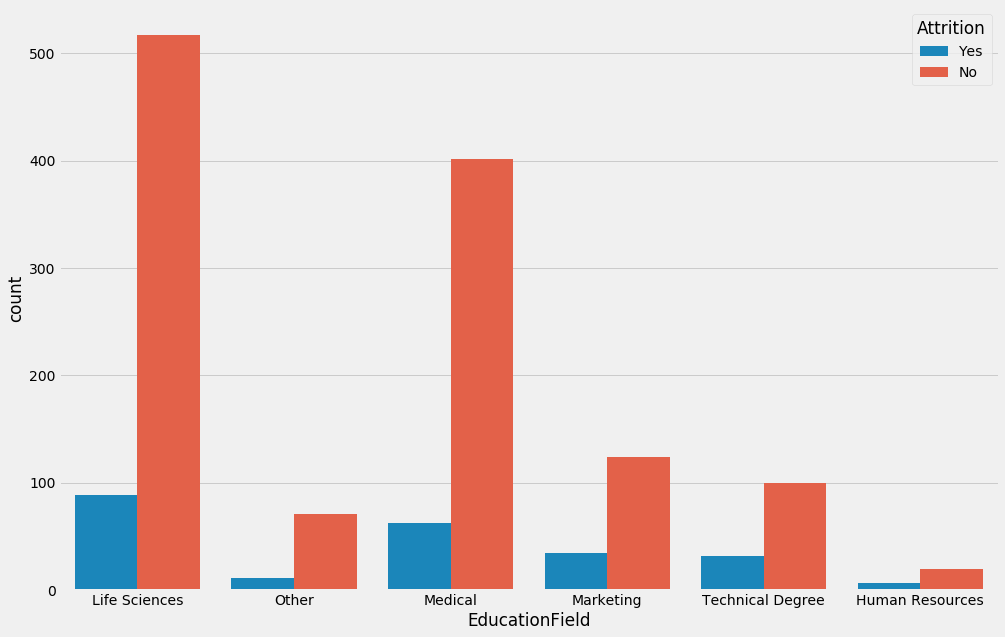

In [44]:
plt.figure(figsize=(15, 10))
sns.countplot(df['EducationField'], hue=df['Attrition'])
# hue itu per targetnya
plt.show()

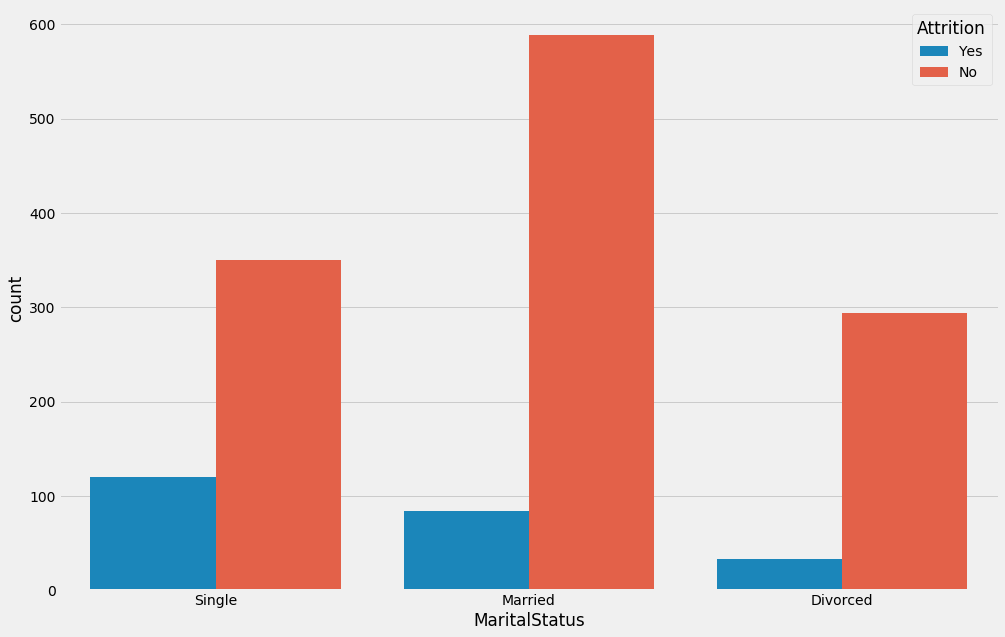

In [35]:
plt.figure(figsize=(15, 10))
sns.countplot(df['MaritalStatus'], hue=df['Attrition'])

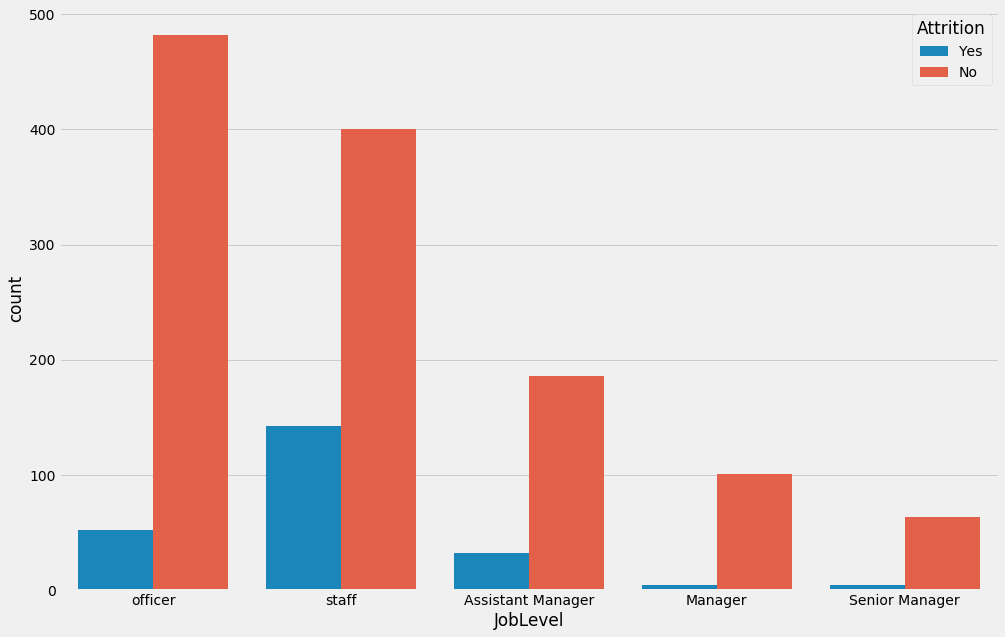

In [45]:
plt.figure(figsize=(15, 10))
sns.countplot(df['JobLevel'], hue=df['Attrition'])
plt.show()

note

In [37]:
df_cleandata = df.copy()

In [38]:
df_cleandata['Attrition'].replace({'No':0, 'Yes':1}, inplace = True)

In [39]:
df_cleandata.to_csv('datasets_IBM_clean.csv', index = False)

In [40]:
df_cleandata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2
